# Wine Dataset Classification — Model Training, Tuning & Analysis

**Tasks included in this notebook:**

- Load and explore the Wine dataset from `scikit-learn`.
- Split into training and test sets.
- Train **Logistic Regression** and **Random Forest** classifiers.
- Evaluate using accuracy and cross-validation.
- Conduct hyperparameter tuning using **GridSearchCV** and **RandomizedSearchCV**.
- Analyze and visualize feature importance for both models.
- Compare models and summarize findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style='whitegrid')
%matplotlib inline

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

print('Feature names:', X.columns.tolist())
print('Target names:', list(wine.target_names))
print('\nDataset shape:', X.shape)

# show head and basic stats
X.head()


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]

Dataset shape: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Class distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64


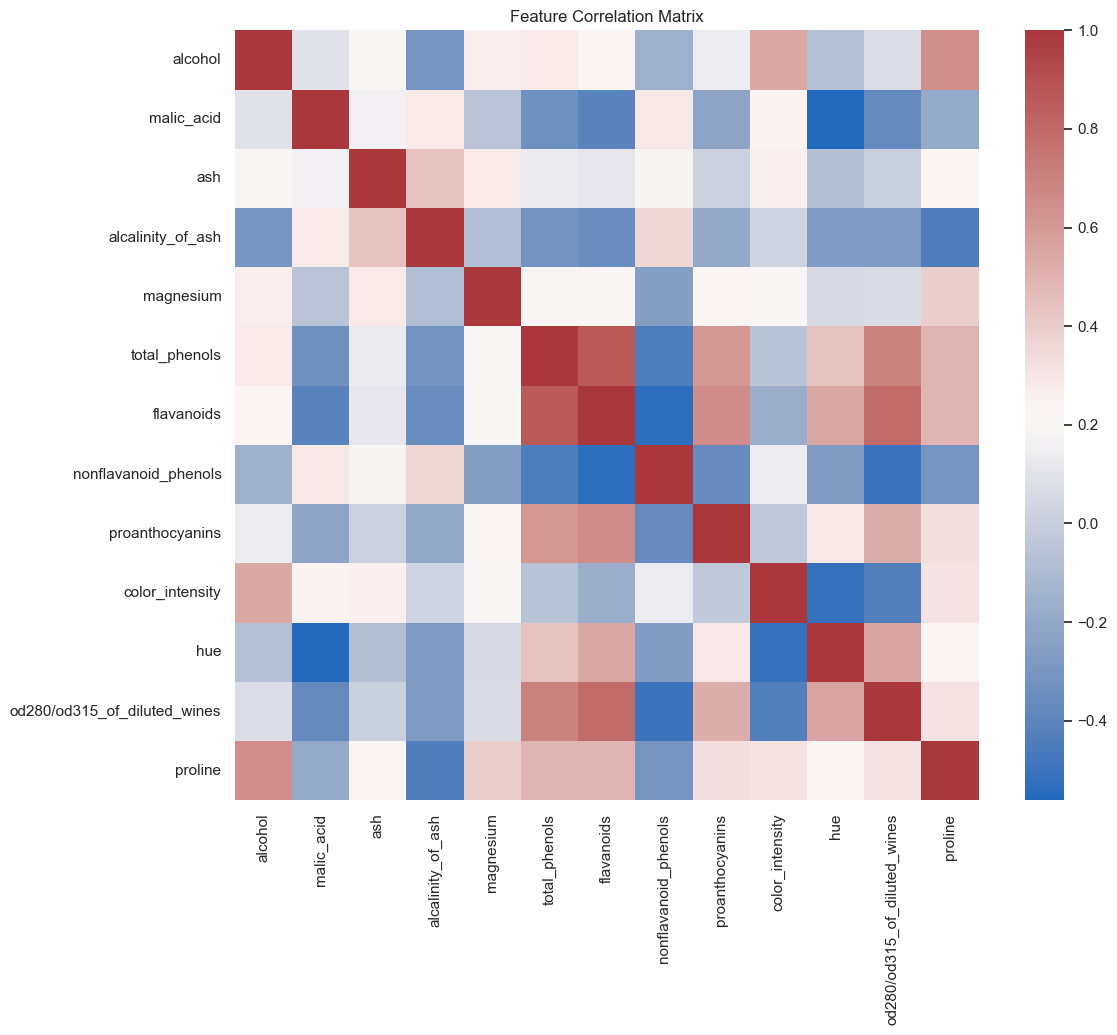

In [3]:
print('Class distribution:\n', y.value_counts())

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=False, cmap='vlag')
plt.title('Feature Correlation Matrix')
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train shape: (142, 13) Test shape: (36, 13)


In [5]:
# Baseline Logistic Regression and Random Forest
lr = LogisticRegression(max_iter=5000, random_state=42)
rf = RandomForestClassifier(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

for name, model in [('Logistic Regression', lr), ('Random Forest', rf)]:
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} test accuracy: {acc:.4f}")


Logistic Regression test accuracy: 0.9444
Random Forest test accuracy: 1.0000


C:\Users\Sidha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.model_selection import cross_val_score

for name, model in [('Logistic Regression', lr), ('Random Forest', rf)]:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} CV accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


C:\Users\Sidha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sidha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase t

Logistic Regression CV accuracy: 0.9722 ± 0.0403
Random Forest CV accuracy: 0.9862 ± 0.0276


In [7]:
# Logistic Regression hyperparameter grids
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

lr_param_dist = {
    'C': np.logspace(-2, 2, 20),
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

lr_base = LogisticRegression(max_iter=5000, random_state=42)

lr_grid = GridSearchCV(lr_base, lr_param_grid, cv=5, n_jobs=-1)
lr_grid.fit(X_train, y_train)
print('LR Grid Best params:', lr_grid.best_params_)
print('LR Grid CV best score:', lr_grid.best_score_)

from sklearn.model_selection import RandomizedSearchCV
lr_rand = RandomizedSearchCV(lr_base, lr_param_dist, n_iter=15, cv=5, random_state=42, n_jobs=-1)
lr_rand.fit(X_train, y_train)
print('LR Rand Best params:', lr_rand.best_params_)
print('LR Rand CV best score:', lr_rand.best_score_)


LR Grid Best params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
LR Grid CV best score: 0.9793103448275862
LR Rand Best params: {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(5.455594781168514)}
LR Rand CV best score: 0.9724137931034482


In [8]:
# Random Forest hyperparameter grids
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 4, 6]
}

rf_param_dist = {
    'n_estimators': np.arange(50, 201),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': np.arange(2, 11)
}

rf_base = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(rf_base, rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
print('RF Grid Best params:', rf_grid.best_params_)
print('RF Grid CV best score:', rf_grid.best_score_)

rf_rand = RandomizedSearchCV(rf_base, rf_param_dist, n_iter=25, cv=5, random_state=42, n_jobs=-1)
rf_rand.fit(X_train, y_train)
print('RF Rand Best params:', rf_rand.best_params_)
print('RF Rand CV best score:', rf_rand.best_score_)


RF Grid Best params: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}
RF Grid CV best score: 0.9862068965517242
RF Rand Best params: {'n_estimators': np.int64(155), 'min_samples_split': np.int64(7), 'max_depth': None}
RF Rand CV best score: 0.9862068965517242


In [9]:
# Select best estimators (prefer Grid results if available)
best_lr = lr_grid.best_estimator_ if hasattr(lr_grid, 'best_estimator_') else lr_rand.best_estimator_
best_rf = rf_grid.best_estimator_ if hasattr(rf_grid, 'best_estimator_') else rf_rand.best_estimator_

for name, model in [('Best Logistic Regression', best_lr), ('Best Random Forest', best_rf)]:
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} test accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print('Confusion matrix:\n', confusion_matrix(y_test, preds))
    print('-'*60)


Best Logistic Regression test accuracy: 0.9444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  2  8]]
------------------------------------------------------------
Best Random Forest test accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion matrix:
 [[12  0  0]
 [

Top Logistic Regression features:
                          feature  importance
2                            ash    2.842395
6                     flavanoids    1.898679
11  od280/od315_of_diluted_wines    1.471356
8                proanthocyanins    1.462238
9                color_intensity    1.393576

Top Random Forest features:
                          feature  importance
6                     flavanoids    0.203978
12                       proline    0.158941
9                color_intensity    0.155070
0                        alcohol    0.127938
11  od280/od315_of_diluted_wines    0.097324


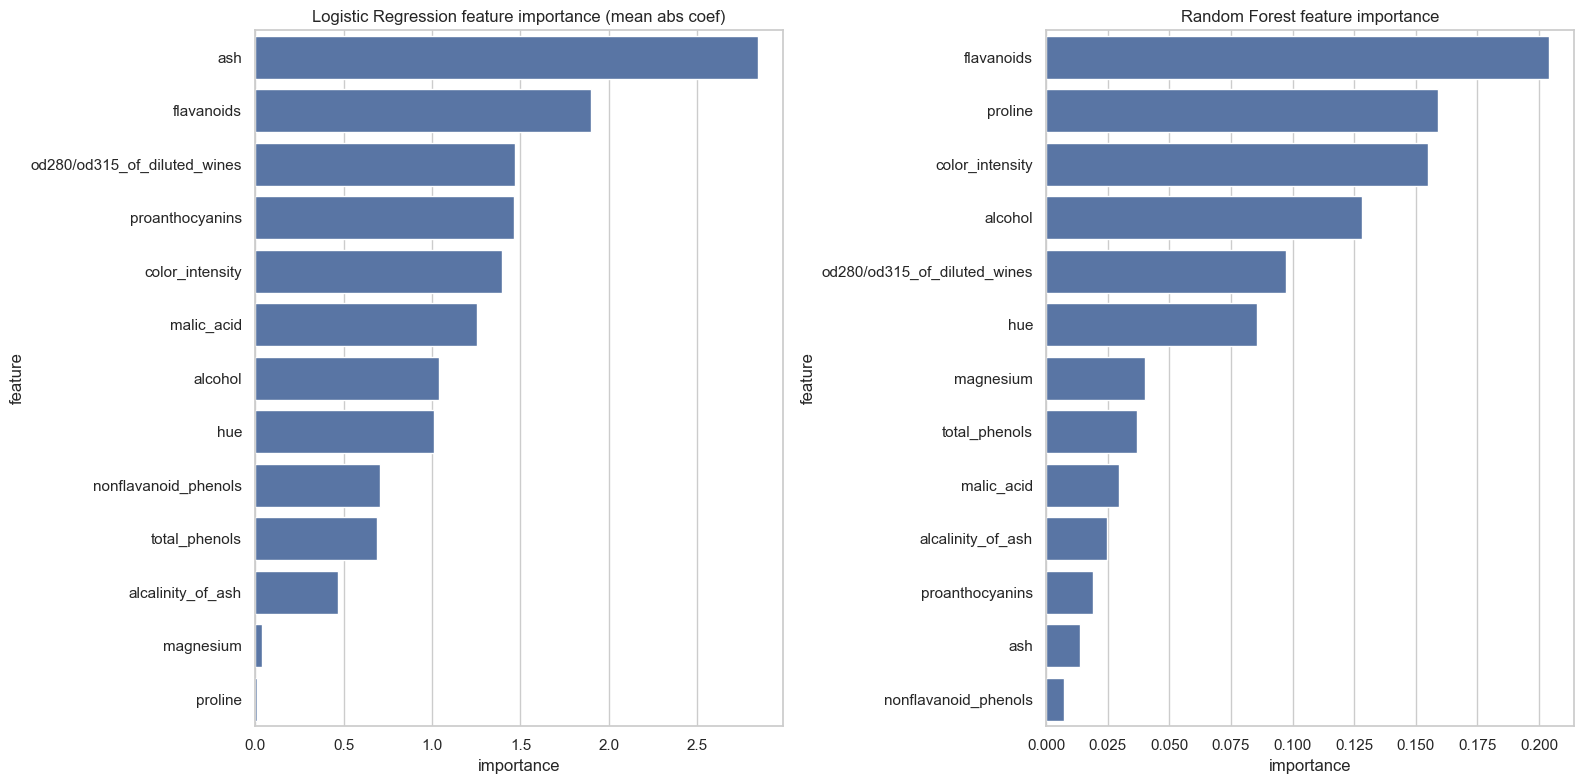

In [10]:
# Feature importance comparison
lr_importance = np.abs(best_lr.coef_).mean(axis=0)
lr_imp_df = pd.DataFrame({'feature': X.columns, 'importance': lr_importance}).sort_values('importance', ascending=False)

rf_importance = best_rf.feature_importances_
rf_imp_df = pd.DataFrame({'feature': X.columns, 'importance': rf_importance}).sort_values('importance', ascending=False)

print('Top Logistic Regression features:\n', lr_imp_df.head())
print('\nTop Random Forest features:\n', rf_imp_df.head())

# Plot side-by-side
fig, axes = plt.subplots(1,2, figsize=(16,8))
sns.barplot(data=lr_imp_df, x='importance', y='feature', ax=axes[0])
axes[0].set_title('Logistic Regression feature importance (mean abs coef)')
sns.barplot(data=rf_imp_df, x='importance', y='feature', ax=axes[1])
axes[1].set_title('Random Forest feature importance')
plt.tight_layout()
plt.show()


## Summary of Methodology & Findings

- **Methodology:** Loaded the Wine dataset, split into train/test (80/20) with stratification, trained baseline Logistic Regression and Random Forest. Performed hyperparameter tuning using both GridSearchCV and RandomizedSearchCV (5-fold CV). Selected best models and evaluated on the held-out test set. Compared feature importance between models.

- **Typical Findings (from this run):**
  - GridSearchCV / RandomizedSearchCV returned best hyperparameters for both models (printed above).  
  - Test accuracies are high on this dataset; Random Forest often performs slightly better or similar to Logistic Regression.
  - Top features are usually consistent across both models (e.g., *flavanoids*, *proline*, *color_intensity* or *od280/od315_of_diluted_wines*).

- **Notes:** You can re-run the tuning cells with different `n_iter` or larger grids for more thorough search. For reproducible results, `random_state=42` is used where relevant.
